In [2]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

    100% |ââââââââââââââââââââââââââââââââ| 53.0MB 5.5kB/s eta 0:00:01ââ     | 44.4MB 10.6MB/s eta 0:00:01âââââââââââââ    | 46.5MB 10.3MB/s eta 0:00:01ï¿½ï¿½âââââââââââ | 50.8MB 4.4MB/s eta 0:00:01 96% |âââââââââââââââââââââââââââââââ | 51.1MB 10.0MB/s eta 0:00:01â | 51.3MB 12.2MB/s eta 0:00:01ï¿½âââââââââââââââââââââââââââââ| 51.6MB 15.1MB/s eta 0:00:01ââââââââââââââââââââââââ| 51.9MB 4.7MB/s eta 0:00:01| 52.3MB 12.7MB/s eta 0:00:01
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |ââââââââââââââââââââââââââââââââ| 122kB 2.8MB/s ta 0:00

      Successfully uninstalled jupyter-client-4.4.0
  Found existing installation: notebook 4.3.1
    DEPRECATION: Uninstalling a distutils installed project (notebook) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling notebook-4.3.1:
      Successfully uninstalled notebook-4.3.1
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import train_values data
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['train_values']
train_values = ds.to_dataframe()

In [5]:
train_values.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,1,1,139.0,1,261,14,246,...,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True
1,1,2,2,1,1,160.0,3,349,48,311,...,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False
2,2,1,2,1,1,168.0,3,385,30,256,...,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False
3,3,1,2,1,1,57.0,3,117,30,46,...,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False
4,4,2,1,2,1,25.0,3,95,41,192,...,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False


In [6]:
# Import train_values data
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['train_labels']
train_labels = ds.to_dataframe()

In [7]:
train_labels.head()

,row_id,rate_spread
0,0,1.0
1,1,2.0
2,2,3.0
3,3,6.0
4,4,4.0


In [8]:
# Join the train_values (features) and train_labels (target)
df = pd.merge(train_values, train_labels, how = 'inner', on = 'row_id')

In [9]:
df.set_index('row_id', inplace = True)
df.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
row_id,,,,,,,,,,,,,,,,,,,,,
0,2,1,1,1,139.0,1,261,14,246,2,...,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1.0
1,2,2,1,1,160.0,3,349,48,311,1,...,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2.0
2,1,2,1,1,168.0,3,385,30,256,3,...,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3.0
3,1,2,1,1,57.0,3,117,30,46,1,...,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6.0
4,2,1,2,1,25.0,3,95,41,192,2,...,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4.0


In [10]:
convert_dict = {'loan_type': 'object', 'property_type':'object', 'loan_purpose': 'object', 'occupancy': 'object',
        'preapproval': 'object', 'msa_md': 'object', 'state_code': 'object', 'county_code': 'object',
       'applicant_ethnicity': 'object', 'applicant_race': 'object', 'applicant_sex': 'object',
       'lender': 'object', 'co_applicant': 'bool', 'loan_amount': 'float'}

df = df.astype(convert_dict)
df.dtypes

loan_type                          object
property_type                      object
loan_purpose                       object
occupancy                          object
loan_amount                       float64
preapproval                        object
msa_md                             object
state_code                         object
county_code                        object
applicant_ethnicity                object
applicant_race                     object
applicant_sex                      object
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                             object
co_applicant                         bool
rate_spread                       float64
dtype: object

In [11]:
null_value_stats = df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

applicant_income                  10708
population                         1995
minority_population_pct            1995
ffiecmedian_family_income          1985
tract_to_msa_md_income_pct         2023
number_of_owner-occupied_units     2012
number_of_1_to_4_family_units      2016
dtype: int64

In [12]:
column = {'msa_md': -1,
        'state_code': -1,
        'county_code': -1}

df.replace(column, np.nan, inplace = True)

In [13]:
df.fillna(-999, inplace = True)

In [14]:
# Features and label for machine learning model
X = df.drop('rate_spread', axis = 'columns')
y = df.rate_spread

In [15]:
categorical_features_indices = np.where(X.dtypes == np.object)[0]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [17]:
#importing library and building model
from catboost import CatBoostRegressor, Pool
model=CatBoostRegressor(iterations=5000, depth=8, learning_rate=0.01, loss_function='RMSE', use_best_model = True,)
%time model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

0:	learn: 2.5453317	test: 2.5932673	best: 2.5932673 (0)	total: 118ms	remaining: 9m 47s
1:	learn: 2.5241911	test: 2.5725242	best: 2.5725242 (1)	total: 186ms	remaining: 7m 44s
2:	learn: 2.5033236	test: 2.5520632	best: 2.5520632 (2)	total: 263ms	remaining: 7m 17s
3:	learn: 2.4826765	test: 2.5318019	best: 2.5318019 (3)	total: 346ms	remaining: 7m 12s


MetricVisualizer(data={'catboost_info': {'content': {'passed_iterations': 3, 'data': {'meta': {'test_sets': ['â¦

4:	learn: 2.4622905	test: 2.5118254	best: 2.5118254 (4)	total: 452ms	remaining: 7m 31s
5:	learn: 2.4421092	test: 2.4920355	best: 2.4920355 (5)	total: 545ms	remaining: 7m 33s
6:	learn: 2.4222423	test: 2.4725602	best: 2.4725602 (6)	total: 631ms	remaining: 7m 29s
7:	learn: 2.4025369	test: 2.4532502	best: 2.4532502 (7)	total: 704ms	remaining: 7m 19s
8:	learn: 2.3830889	test: 2.4342177	best: 2.4342177 (8)	total: 831ms	remaining: 7m 40s
9:	learn: 2.3639150	test: 2.4153618	best: 2.4153618 (9)	total: 903ms	remaining: 7m 30s
10:	learn: 2.3449013	test: 2.3967579	best: 2.3967579 (10)	total: 981ms	remaining: 7m 24s
11:	learn: 2.3261806	test: 2.3783655	best: 2.3783655 (11)	total: 1.08s	remaining: 7m 30s
12:	learn: 2.3076077	test: 2.3601942	best: 2.3601942 (12)	total: 1.15s	remaining: 7m 21s
13:	learn: 2.2892506	test: 2.3422390	best: 2.3422390 (13)	total: 1.23s	remaining: 7m 16s
14:	learn: 2.2711073	test: 2.3244931	best: 2.3244931 (14)	total: 1.31s	remaining: 7m 14s
15:	learn: 2.2532681	test: 2.3069

97:	learn: 1.3527333	test: 1.4363864	best: 1.4363864 (97)	total: 7.73s	remaining: 6m 26s
98:	learn: 1.3469146	test: 1.4308136	best: 1.4308136 (98)	total: 7.8s	remaining: 6m 26s
99:	learn: 1.3411339	test: 1.4253562	best: 1.4253562 (99)	total: 7.9s	remaining: 6m 26s
100:	learn: 1.3354585	test: 1.4199047	best: 1.4199047 (100)	total: 7.98s	remaining: 6m 26s
101:	learn: 1.3298614	test: 1.4146406	best: 1.4146406 (101)	total: 8.06s	remaining: 6m 26s
102:	learn: 1.3243336	test: 1.4094320	best: 1.4094320 (102)	total: 8.13s	remaining: 6m 26s
103:	learn: 1.3189020	test: 1.4042259	best: 1.4042259 (103)	total: 8.2s	remaining: 6m 25s
104:	learn: 1.3135067	test: 1.3991648	best: 1.3991648 (104)	total: 8.27s	remaining: 6m 25s
105:	learn: 1.3082206	test: 1.3941589	best: 1.3941589 (105)	total: 8.34s	remaining: 6m 25s
106:	learn: 1.3030768	test: 1.3892609	best: 1.3892609 (106)	total: 8.43s	remaining: 6m 25s
107:	learn: 1.2979399	test: 1.3844522	best: 1.3844522 (107)	total: 8.5s	remaining: 6m 25s
108:	lear

188:	learn: 1.0646664	test: 1.1640282	best: 1.1640282 (188)	total: 14.7s	remaining: 6m 15s
189:	learn: 1.0632047	test: 1.1625665	best: 1.1625665 (189)	total: 14.8s	remaining: 6m 15s
190:	learn: 1.0617986	test: 1.1611877	best: 1.1611877 (190)	total: 14.9s	remaining: 6m 16s
191:	learn: 1.0604373	test: 1.1598334	best: 1.1598334 (191)	total: 15.1s	remaining: 6m 17s
192:	learn: 1.0590629	test: 1.1582885	best: 1.1582885 (192)	total: 15.1s	remaining: 6m 17s
193:	learn: 1.0577164	test: 1.1571492	best: 1.1571492 (193)	total: 15.2s	remaining: 6m 16s
194:	learn: 1.0564040	test: 1.1558278	best: 1.1558278 (194)	total: 15.3s	remaining: 6m 17s
195:	learn: 1.0551212	test: 1.1545269	best: 1.1545269 (195)	total: 15.4s	remaining: 6m 18s
196:	learn: 1.0538512	test: 1.1532749	best: 1.1532749 (196)	total: 15.6s	remaining: 6m 19s
197:	learn: 1.0525899	test: 1.1519914	best: 1.1519914 (197)	total: 15.7s	remaining: 6m 19s
198:	learn: 1.0513362	test: 1.1509501	best: 1.1509501 (198)	total: 15.8s	remaining: 6m 20s

281:	learn: 0.9915972	test: 1.0935852	best: 1.0935852 (281)	total: 22.1s	remaining: 6m 10s
282:	learn: 0.9911546	test: 1.0931836	best: 1.0931836 (282)	total: 22.2s	remaining: 6m 10s
283:	learn: 0.9907225	test: 1.0928613	best: 1.0928613 (283)	total: 22.3s	remaining: 6m 9s
284:	learn: 0.9902782	test: 1.0924627	best: 1.0924627 (284)	total: 22.3s	remaining: 6m 9s
285:	learn: 0.9898579	test: 1.0919790	best: 1.0919790 (285)	total: 22.4s	remaining: 6m 9s
286:	learn: 0.9894369	test: 1.0914906	best: 1.0914906 (286)	total: 22.5s	remaining: 6m 9s
287:	learn: 0.9890547	test: 1.0911636	best: 1.0911636 (287)	total: 22.6s	remaining: 6m 9s
288:	learn: 0.9886653	test: 1.0907576	best: 1.0907576 (288)	total: 22.7s	remaining: 6m 9s
289:	learn: 0.9883322	test: 1.0904722	best: 1.0904722 (289)	total: 22.7s	remaining: 6m 9s
290:	learn: 0.9879815	test: 1.0901476	best: 1.0901476 (290)	total: 22.8s	remaining: 6m 9s
291:	learn: 0.9876511	test: 1.0898670	best: 1.0898670 (291)	total: 22.9s	remaining: 6m 8s
292:	lea

373:	learn: 0.9654725	test: 1.0701031	best: 1.0701031 (373)	total: 29.6s	remaining: 6m 6s
374:	learn: 0.9652970	test: 1.0699288	best: 1.0699288 (374)	total: 29.7s	remaining: 6m 6s
375:	learn: 0.9651138	test: 1.0697791	best: 1.0697791 (375)	total: 29.8s	remaining: 6m 6s
376:	learn: 0.9649519	test: 1.0696423	best: 1.0696423 (376)	total: 29.9s	remaining: 6m 6s
377:	learn: 0.9647330	test: 1.0695129	best: 1.0695129 (377)	total: 30s	remaining: 6m 6s
378:	learn: 0.9644710	test: 1.0692960	best: 1.0692960 (378)	total: 30.1s	remaining: 6m 7s
379:	learn: 0.9643033	test: 1.0692215	best: 1.0692215 (379)	total: 30.2s	remaining: 6m 7s
380:	learn: 0.9641099	test: 1.0690778	best: 1.0690778 (380)	total: 30.3s	remaining: 6m 7s
381:	learn: 0.9638430	test: 1.0687936	best: 1.0687936 (381)	total: 30.4s	remaining: 6m 7s
382:	learn: 0.9637162	test: 1.0687376	best: 1.0687376 (382)	total: 30.5s	remaining: 6m 7s
383:	learn: 0.9635529	test: 1.0685904	best: 1.0685904 (383)	total: 30.5s	remaining: 6m 7s
384:	learn: 

467:	learn: 0.9503357	test: 1.0568506	best: 1.0568506 (467)	total: 37.8s	remaining: 6m 5s
468:	learn: 0.9502295	test: 1.0568024	best: 1.0568024 (468)	total: 37.8s	remaining: 6m 5s
469:	learn: 0.9501368	test: 1.0567746	best: 1.0567746 (469)	total: 37.9s	remaining: 6m 5s
470:	learn: 0.9500487	test: 1.0566308	best: 1.0566308 (470)	total: 38s	remaining: 6m 5s
471:	learn: 0.9499099	test: 1.0564425	best: 1.0564425 (471)	total: 38.1s	remaining: 6m 5s
472:	learn: 0.9497805	test: 1.0563989	best: 1.0563989 (472)	total: 38.1s	remaining: 6m 5s
473:	learn: 0.9496192	test: 1.0562016	best: 1.0562016 (473)	total: 38.2s	remaining: 6m 5s
474:	learn: 0.9494807	test: 1.0560905	best: 1.0560905 (474)	total: 38.3s	remaining: 6m 4s
475:	learn: 0.9493968	test: 1.0560589	best: 1.0560589 (475)	total: 38.4s	remaining: 6m 4s
476:	learn: 0.9492935	test: 1.0559008	best: 1.0559008 (476)	total: 38.5s	remaining: 6m 4s
477:	learn: 0.9491285	test: 1.0557593	best: 1.0557593 (477)	total: 38.5s	remaining: 6m 4s
478:	learn: 

559:	learn: 0.9400246	test: 1.0478743	best: 1.0478743 (559)	total: 44.8s	remaining: 5m 55s
560:	learn: 0.9399224	test: 1.0477895	best: 1.0477895 (560)	total: 44.9s	remaining: 5m 55s
561:	learn: 0.9397954	test: 1.0474879	best: 1.0474879 (561)	total: 45.1s	remaining: 5m 55s
562:	learn: 0.9396359	test: 1.0473543	best: 1.0473543 (562)	total: 45.1s	remaining: 5m 55s
563:	learn: 0.9395036	test: 1.0472287	best: 1.0472287 (563)	total: 45.2s	remaining: 5m 55s
564:	learn: 0.9393925	test: 1.0471061	best: 1.0471061 (564)	total: 45.3s	remaining: 5m 55s
565:	learn: 0.9393116	test: 1.0470154	best: 1.0470154 (565)	total: 45.3s	remaining: 5m 55s
566:	learn: 0.9391712	test: 1.0468953	best: 1.0468953 (566)	total: 45.4s	remaining: 5m 55s
567:	learn: 0.9390297	test: 1.0467812	best: 1.0467812 (567)	total: 45.5s	remaining: 5m 55s
568:	learn: 0.9388600	test: 1.0466324	best: 1.0466324 (568)	total: 45.6s	remaining: 5m 54s
569:	learn: 0.9387708	test: 1.0465867	best: 1.0465867 (569)	total: 45.6s	remaining: 5m 54s

651:	learn: 0.9312828	test: 1.0404165	best: 1.0404165 (651)	total: 51.9s	remaining: 5m 45s
652:	learn: 0.9312316	test: 1.0403146	best: 1.0403146 (652)	total: 52s	remaining: 5m 46s
653:	learn: 0.9311680	test: 1.0402983	best: 1.0402983 (653)	total: 52.1s	remaining: 5m 46s
654:	learn: 0.9310528	test: 1.0401956	best: 1.0401956 (654)	total: 52.1s	remaining: 5m 45s
655:	learn: 0.9309407	test: 1.0400970	best: 1.0400970 (655)	total: 52.2s	remaining: 5m 45s
656:	learn: 0.9308247	test: 1.0399979	best: 1.0399979 (656)	total: 52.3s	remaining: 5m 45s
657:	learn: 0.9307353	test: 1.0399243	best: 1.0399243 (657)	total: 52.4s	remaining: 5m 45s
658:	learn: 0.9306210	test: 1.0398490	best: 1.0398490 (658)	total: 52.5s	remaining: 5m 45s
659:	learn: 0.9305501	test: 1.0398345	best: 1.0398345 (659)	total: 52.6s	remaining: 5m 45s
660:	learn: 0.9304356	test: 1.0397194	best: 1.0397194 (660)	total: 52.6s	remaining: 5m 45s
661:	learn: 0.9303557	test: 1.0396662	best: 1.0396662 (661)	total: 52.7s	remaining: 5m 45s
6

742:	learn: 0.9238228	test: 1.0341155	best: 1.0341155 (742)	total: 59.1s	remaining: 5m 38s
743:	learn: 0.9237454	test: 1.0340390	best: 1.0340390 (743)	total: 59.2s	remaining: 5m 38s
744:	learn: 0.9236765	test: 1.0339733	best: 1.0339733 (744)	total: 59.3s	remaining: 5m 38s
745:	learn: 0.9236142	test: 1.0339236	best: 1.0339236 (745)	total: 59.4s	remaining: 5m 38s
746:	learn: 0.9234822	test: 1.0338018	best: 1.0338018 (746)	total: 59.5s	remaining: 5m 38s
747:	learn: 0.9233672	test: 1.0336942	best: 1.0336942 (747)	total: 59.6s	remaining: 5m 38s
748:	learn: 0.9232618	test: 1.0335927	best: 1.0335927 (748)	total: 59.6s	remaining: 5m 38s
749:	learn: 0.9231735	test: 1.0335222	best: 1.0335222 (749)	total: 59.7s	remaining: 5m 38s
750:	learn: 0.9231218	test: 1.0334932	best: 1.0334932 (750)	total: 59.8s	remaining: 5m 38s
751:	learn: 0.9230311	test: 1.0333582	best: 1.0333582 (751)	total: 59.8s	remaining: 5m 38s
752:	learn: 0.9229635	test: 1.0333152	best: 1.0333152 (752)	total: 59.9s	remaining: 5m 37s

833:	learn: 0.9167956	test: 1.0282870	best: 1.0282870 (833)	total: 1m 6s	remaining: 5m 31s
834:	learn: 0.9166931	test: 1.0282002	best: 1.0282002 (834)	total: 1m 6s	remaining: 5m 31s
835:	learn: 0.9165747	test: 1.0281093	best: 1.0281093 (835)	total: 1m 6s	remaining: 5m 31s
836:	learn: 0.9164633	test: 1.0280069	best: 1.0280069 (836)	total: 1m 6s	remaining: 5m 31s
837:	learn: 0.9163852	test: 1.0279372	best: 1.0279372 (837)	total: 1m 6s	remaining: 5m 30s
838:	learn: 0.9163410	test: 1.0279342	best: 1.0279342 (838)	total: 1m 6s	remaining: 5m 30s
839:	learn: 0.9162669	test: 1.0278941	best: 1.0278941 (839)	total: 1m 6s	remaining: 5m 30s
840:	learn: 0.9161477	test: 1.0277983	best: 1.0277983 (840)	total: 1m 6s	remaining: 5m 30s
841:	learn: 0.9160511	test: 1.0277196	best: 1.0277196 (841)	total: 1m 6s	remaining: 5m 30s
842:	learn: 0.9159938	test: 1.0276830	best: 1.0276830 (842)	total: 1m 7s	remaining: 5m 30s
843:	learn: 0.9159401	test: 1.0275939	best: 1.0275939 (843)	total: 1m 7s	remaining: 5m 30s

925:	learn: 0.9100633	test: 1.0226082	best: 1.0226082 (925)	total: 1m 13s	remaining: 5m 22s
926:	learn: 0.9100058	test: 1.0225852	best: 1.0225852 (926)	total: 1m 13s	remaining: 5m 22s
927:	learn: 0.9099454	test: 1.0225155	best: 1.0225155 (927)	total: 1m 13s	remaining: 5m 22s
928:	learn: 0.9098665	test: 1.0224680	best: 1.0224680 (928)	total: 1m 13s	remaining: 5m 23s
929:	learn: 0.9098294	test: 1.0224657	best: 1.0224657 (929)	total: 1m 13s	remaining: 5m 23s
930:	learn: 0.9097349	test: 1.0223892	best: 1.0223892 (930)	total: 1m 13s	remaining: 5m 23s
931:	learn: 0.9096647	test: 1.0222977	best: 1.0222977 (931)	total: 1m 13s	remaining: 5m 22s
932:	learn: 0.9095822	test: 1.0222325	best: 1.0222325 (932)	total: 1m 14s	remaining: 5m 22s
933:	learn: 0.9095448	test: 1.0222087	best: 1.0222087 (933)	total: 1m 14s	remaining: 5m 22s
934:	learn: 0.9094927	test: 1.0221939	best: 1.0221939 (934)	total: 1m 14s	remaining: 5m 22s
935:	learn: 0.9094494	test: 1.0221760	best: 1.0221760 (935)	total: 1m 14s	remain

1015:	learn: 0.9040650	test: 1.0176036	best: 1.0176036 (1015)	total: 1m 20s	remaining: 5m 16s
1016:	learn: 0.9039899	test: 1.0175350	best: 1.0175350 (1016)	total: 1m 20s	remaining: 5m 16s
1017:	learn: 0.9038814	test: 1.0174529	best: 1.0174529 (1017)	total: 1m 20s	remaining: 5m 16s
1018:	learn: 0.9038256	test: 1.0174085	best: 1.0174085 (1018)	total: 1m 21s	remaining: 5m 16s
1019:	learn: 0.9036991	test: 1.0172917	best: 1.0172917 (1019)	total: 1m 21s	remaining: 5m 16s
1020:	learn: 0.9036228	test: 1.0172228	best: 1.0172228 (1020)	total: 1m 21s	remaining: 5m 16s
1021:	learn: 0.9035508	test: 1.0171645	best: 1.0171645 (1021)	total: 1m 21s	remaining: 5m 16s
1022:	learn: 0.9034581	test: 1.0170975	best: 1.0170975 (1022)	total: 1m 21s	remaining: 5m 16s
1023:	learn: 0.9033774	test: 1.0170134	best: 1.0170134 (1023)	total: 1m 21s	remaining: 5m 16s
1024:	learn: 0.9033171	test: 1.0169513	best: 1.0169513 (1024)	total: 1m 21s	remaining: 5m 16s
1025:	learn: 0.9032627	test: 1.0169282	best: 1.0169282 (1025

1105:	learn: 0.8985046	test: 1.0132399	best: 1.0132399 (1105)	total: 1m 28s	remaining: 5m 12s
1106:	learn: 0.8984707	test: 1.0132369	best: 1.0132369 (1106)	total: 1m 28s	remaining: 5m 12s
1107:	learn: 0.8984076	test: 1.0131924	best: 1.0131924 (1107)	total: 1m 28s	remaining: 5m 11s
1108:	learn: 0.8983731	test: 1.0131283	best: 1.0131283 (1108)	total: 1m 28s	remaining: 5m 11s
1109:	learn: 0.8983415	test: 1.0131192	best: 1.0131192 (1109)	total: 1m 28s	remaining: 5m 11s
1110:	learn: 0.8982627	test: 1.0130482	best: 1.0130482 (1110)	total: 1m 29s	remaining: 5m 11s
1111:	learn: 0.8982366	test: 1.0130407	best: 1.0130407 (1111)	total: 1m 29s	remaining: 5m 11s
1112:	learn: 0.8981919	test: 1.0130174	best: 1.0130174 (1112)	total: 1m 29s	remaining: 5m 11s
1113:	learn: 0.8981483	test: 1.0130077	best: 1.0130077 (1113)	total: 1m 29s	remaining: 5m 11s
1114:	learn: 0.8981136	test: 1.0130036	best: 1.0130036 (1114)	total: 1m 29s	remaining: 5m 11s
1115:	learn: 0.8980353	test: 1.0129366	best: 1.0129366 (1115

1194:	learn: 0.8937751	test: 1.0095569	best: 1.0095569 (1194)	total: 1m 36s	remaining: 5m 6s
1195:	learn: 0.8937005	test: 1.0094986	best: 1.0094986 (1195)	total: 1m 36s	remaining: 5m 5s
1196:	learn: 0.8935906	test: 1.0094204	best: 1.0094204 (1196)	total: 1m 36s	remaining: 5m 5s
1197:	learn: 0.8935333	test: 1.0093391	best: 1.0093391 (1197)	total: 1m 36s	remaining: 5m 5s
1198:	learn: 0.8934355	test: 1.0092545	best: 1.0092545 (1198)	total: 1m 36s	remaining: 5m 5s
1199:	learn: 0.8933990	test: 1.0092476	best: 1.0092476 (1199)	total: 1m 36s	remaining: 5m 5s
1200:	learn: 0.8933051	test: 1.0091695	best: 1.0091695 (1200)	total: 1m 36s	remaining: 5m 5s
1201:	learn: 0.8932128	test: 1.0091003	best: 1.0091003 (1201)	total: 1m 36s	remaining: 5m 5s
1202:	learn: 0.8931380	test: 1.0089772	best: 1.0089772 (1202)	total: 1m 36s	remaining: 5m 5s
1203:	learn: 0.8931044	test: 1.0089618	best: 1.0089618 (1203)	total: 1m 36s	remaining: 5m 5s
1204:	learn: 0.8930739	test: 1.0089387	best: 1.0089387 (1204)	total: 1

1285:	learn: 0.8886846	test: 1.0053427	best: 1.0053427 (1285)	total: 1m 43s	remaining: 4m 58s
1286:	learn: 0.8886586	test: 1.0053252	best: 1.0053252 (1286)	total: 1m 43s	remaining: 4m 58s
1287:	learn: 0.8886227	test: 1.0053143	best: 1.0053143 (1287)	total: 1m 43s	remaining: 4m 58s
1288:	learn: 0.8885521	test: 1.0052593	best: 1.0052593 (1288)	total: 1m 43s	remaining: 4m 58s
1289:	learn: 0.8885258	test: 1.0052571	best: 1.0052571 (1289)	total: 1m 43s	remaining: 4m 58s
1290:	learn: 0.8884800	test: 1.0052162	best: 1.0052162 (1290)	total: 1m 43s	remaining: 4m 58s
1291:	learn: 0.8884446	test: 1.0052118	best: 1.0052118 (1291)	total: 1m 43s	remaining: 4m 58s
1292:	learn: 0.8884155	test: 1.0052215	best: 1.0052118 (1291)	total: 1m 44s	remaining: 4m 58s
1293:	learn: 0.8883731	test: 1.0051863	best: 1.0051863 (1293)	total: 1m 44s	remaining: 4m 58s
1294:	learn: 0.8883028	test: 1.0051285	best: 1.0051285 (1294)	total: 1m 44s	remaining: 4m 58s
1295:	learn: 0.8882341	test: 1.0050842	best: 1.0050842 (1295

1373:	learn: 0.8844478	test: 1.0024244	best: 1.0024244 (1373)	total: 1m 50s	remaining: 4m 51s
1374:	learn: 0.8844077	test: 1.0023998	best: 1.0023998 (1374)	total: 1m 50s	remaining: 4m 51s
1375:	learn: 0.8843761	test: 1.0023859	best: 1.0023859 (1375)	total: 1m 50s	remaining: 4m 50s
1376:	learn: 0.8843064	test: 1.0023321	best: 1.0023321 (1376)	total: 1m 50s	remaining: 4m 50s
1377:	learn: 0.8842769	test: 1.0023172	best: 1.0023172 (1377)	total: 1m 50s	remaining: 4m 50s
1378:	learn: 0.8842562	test: 1.0023207	best: 1.0023172 (1377)	total: 1m 50s	remaining: 4m 50s
1379:	learn: 0.8842029	test: 1.0022718	best: 1.0022718 (1379)	total: 1m 50s	remaining: 4m 50s
1380:	learn: 0.8841862	test: 1.0022494	best: 1.0022494 (1380)	total: 1m 50s	remaining: 4m 50s
1381:	learn: 0.8840924	test: 1.0021697	best: 1.0021697 (1381)	total: 1m 50s	remaining: 4m 50s
1382:	learn: 0.8840239	test: 1.0021293	best: 1.0021293 (1382)	total: 1m 51s	remaining: 4m 50s
1383:	learn: 0.8839628	test: 1.0020857	best: 1.0020857 (1383

1462:	learn: 0.8803915	test: 0.9993112	best: 0.9993112 (1462)	total: 1m 57s	remaining: 4m 44s
1463:	learn: 0.8803556	test: 0.9992871	best: 0.9992871 (1463)	total: 1m 57s	remaining: 4m 44s
1464:	learn: 0.8803238	test: 0.9992828	best: 0.9992828 (1464)	total: 1m 57s	remaining: 4m 44s
1465:	learn: 0.8802388	test: 0.9992108	best: 0.9992108 (1465)	total: 1m 57s	remaining: 4m 44s
1466:	learn: 0.8801394	test: 0.9991271	best: 0.9991271 (1466)	total: 1m 57s	remaining: 4m 44s
1467:	learn: 0.8801137	test: 0.9991087	best: 0.9991087 (1467)	total: 1m 58s	remaining: 4m 43s
1468:	learn: 0.8800658	test: 0.9990886	best: 0.9990886 (1468)	total: 1m 58s	remaining: 4m 43s
1469:	learn: 0.8800372	test: 0.9990798	best: 0.9990798 (1469)	total: 1m 58s	remaining: 4m 43s
1470:	learn: 0.8799979	test: 0.9990475	best: 0.9990475 (1470)	total: 1m 58s	remaining: 4m 43s
1471:	learn: 0.8799209	test: 0.9989536	best: 0.9989536 (1471)	total: 1m 58s	remaining: 4m 43s
1472:	learn: 0.8798811	test: 0.9989253	best: 0.9989253 (1472

1551:	learn: 0.8764940	test: 0.9966191	best: 0.9966191 (1551)	total: 2m 5s	remaining: 4m 38s
1552:	learn: 0.8764212	test: 0.9965640	best: 0.9965640 (1552)	total: 2m 5s	remaining: 4m 37s
1553:	learn: 0.8763536	test: 0.9965146	best: 0.9965146 (1553)	total: 2m 5s	remaining: 4m 37s
1554:	learn: 0.8763246	test: 0.9965071	best: 0.9965071 (1554)	total: 2m 5s	remaining: 4m 37s
1555:	learn: 0.8762805	test: 0.9964530	best: 0.9964530 (1555)	total: 2m 5s	remaining: 4m 37s
1556:	learn: 0.8762497	test: 0.9964372	best: 0.9964372 (1556)	total: 2m 5s	remaining: 4m 37s
1557:	learn: 0.8761927	test: 0.9964084	best: 0.9964084 (1557)	total: 2m 5s	remaining: 4m 37s
1558:	learn: 0.8761146	test: 0.9963384	best: 0.9963384 (1558)	total: 2m 5s	remaining: 4m 37s
1559:	learn: 0.8760749	test: 0.9962707	best: 0.9962707 (1559)	total: 2m 5s	remaining: 4m 37s
1560:	learn: 0.8760309	test: 0.9962258	best: 0.9962258 (1560)	total: 2m 5s	remaining: 4m 37s
1561:	learn: 0.8760043	test: 0.9962148	best: 0.9962148 (1561)	total: 2

1639:	learn: 0.8729416	test: 0.9940714	best: 0.9940714 (1639)	total: 2m 12s	remaining: 4m 30s
1640:	learn: 0.8728943	test: 0.9940277	best: 0.9940277 (1640)	total: 2m 12s	remaining: 4m 30s
1641:	learn: 0.8728622	test: 0.9940064	best: 0.9940064 (1641)	total: 2m 12s	remaining: 4m 30s
1642:	learn: 0.8728443	test: 0.9939958	best: 0.9939958 (1642)	total: 2m 12s	remaining: 4m 30s
1643:	learn: 0.8728151	test: 0.9939927	best: 0.9939927 (1643)	total: 2m 12s	remaining: 4m 30s
1644:	learn: 0.8727889	test: 0.9939849	best: 0.9939849 (1644)	total: 2m 12s	remaining: 4m 30s
1645:	learn: 0.8727505	test: 0.9939573	best: 0.9939573 (1645)	total: 2m 12s	remaining: 4m 30s
1646:	learn: 0.8727202	test: 0.9939470	best: 0.9939470 (1646)	total: 2m 12s	remaining: 4m 30s
1647:	learn: 0.8726880	test: 0.9939333	best: 0.9939333 (1647)	total: 2m 12s	remaining: 4m 30s
1648:	learn: 0.8726356	test: 0.9938858	best: 0.9938858 (1648)	total: 2m 12s	remaining: 4m 29s
1649:	learn: 0.8725962	test: 0.9938598	best: 0.9938598 (1649

1727:	learn: 0.8694646	test: 0.9916477	best: 0.9916477 (1727)	total: 2m 19s	remaining: 4m 23s
1728:	learn: 0.8694123	test: 0.9916169	best: 0.9916169 (1728)	total: 2m 19s	remaining: 4m 23s
1729:	learn: 0.8693577	test: 0.9915745	best: 0.9915745 (1729)	total: 2m 19s	remaining: 4m 23s
1730:	learn: 0.8693364	test: 0.9915609	best: 0.9915609 (1730)	total: 2m 19s	remaining: 4m 23s
1731:	learn: 0.8693039	test: 0.9915405	best: 0.9915405 (1731)	total: 2m 19s	remaining: 4m 23s
1732:	learn: 0.8692887	test: 0.9915419	best: 0.9915405 (1731)	total: 2m 19s	remaining: 4m 22s
1733:	learn: 0.8692120	test: 0.9914770	best: 0.9914770 (1733)	total: 2m 19s	remaining: 4m 22s
1734:	learn: 0.8691849	test: 0.9914600	best: 0.9914600 (1734)	total: 2m 19s	remaining: 4m 22s
1735:	learn: 0.8691669	test: 0.9914550	best: 0.9914550 (1735)	total: 2m 19s	remaining: 4m 22s
1736:	learn: 0.8691293	test: 0.9914395	best: 0.9914395 (1736)	total: 2m 19s	remaining: 4m 22s
1737:	learn: 0.8690948	test: 0.9913794	best: 0.9913794 (1737

1815:	learn: 0.8659691	test: 0.9890899	best: 0.9890899 (1815)	total: 2m 26s	remaining: 4m 16s
1816:	learn: 0.8659488	test: 0.9890639	best: 0.9890639 (1816)	total: 2m 26s	remaining: 4m 16s
1817:	learn: 0.8658886	test: 0.9890092	best: 0.9890092 (1817)	total: 2m 26s	remaining: 4m 16s
1818:	learn: 0.8658735	test: 0.9889851	best: 0.9889851 (1818)	total: 2m 26s	remaining: 4m 16s
1819:	learn: 0.8658461	test: 0.9889640	best: 0.9889640 (1819)	total: 2m 26s	remaining: 4m 16s
1820:	learn: 0.8658080	test: 0.9889497	best: 0.9889497 (1820)	total: 2m 26s	remaining: 4m 16s
1821:	learn: 0.8657819	test: 0.9889431	best: 0.9889431 (1821)	total: 2m 26s	remaining: 4m 16s
1822:	learn: 0.8657291	test: 0.9888732	best: 0.9888732 (1822)	total: 2m 27s	remaining: 4m 16s
1823:	learn: 0.8657087	test: 0.9888692	best: 0.9888692 (1823)	total: 2m 27s	remaining: 4m 16s
1824:	learn: 0.8656653	test: 0.9888369	best: 0.9888369 (1824)	total: 2m 27s	remaining: 4m 16s
1825:	learn: 0.8656284	test: 0.9888115	best: 0.9888115 (1825

1904:	learn: 0.8624156	test: 0.9867768	best: 0.9867768 (1904)	total: 2m 33s	remaining: 4m 9s
1905:	learn: 0.8623633	test: 0.9867410	best: 0.9867410 (1905)	total: 2m 33s	remaining: 4m 9s
1906:	learn: 0.8623331	test: 0.9867431	best: 0.9867410 (1905)	total: 2m 34s	remaining: 4m 9s
1907:	learn: 0.8622837	test: 0.9867144	best: 0.9867144 (1907)	total: 2m 34s	remaining: 4m 9s
1908:	learn: 0.8622531	test: 0.9866972	best: 0.9866972 (1908)	total: 2m 34s	remaining: 4m 9s
1909:	learn: 0.8622270	test: 0.9866935	best: 0.9866935 (1909)	total: 2m 34s	remaining: 4m 9s
1910:	learn: 0.8621978	test: 0.9866752	best: 0.9866752 (1910)	total: 2m 34s	remaining: 4m 9s
1911:	learn: 0.8621029	test: 0.9865957	best: 0.9865957 (1911)	total: 2m 34s	remaining: 4m 9s
1912:	learn: 0.8620595	test: 0.9865632	best: 0.9865632 (1912)	total: 2m 34s	remaining: 4m 9s
1913:	learn: 0.8620410	test: 0.9865627	best: 0.9865627 (1913)	total: 2m 34s	remaining: 4m 9s
1914:	learn: 0.8619980	test: 0.9865371	best: 0.9865371 (1914)	total: 2

1993:	learn: 0.8592871	test: 0.9846537	best: 0.9846537 (1993)	total: 2m 42s	remaining: 4m 4s
1994:	learn: 0.8592574	test: 0.9846477	best: 0.9846477 (1994)	total: 2m 42s	remaining: 4m 4s
1995:	learn: 0.8592415	test: 0.9846312	best: 0.9846312 (1995)	total: 2m 42s	remaining: 4m 4s
1996:	learn: 0.8592218	test: 0.9846254	best: 0.9846254 (1996)	total: 2m 42s	remaining: 4m 4s
1997:	learn: 0.8592040	test: 0.9846000	best: 0.9846000 (1997)	total: 2m 42s	remaining: 4m 4s
1998:	learn: 0.8591738	test: 0.9845871	best: 0.9845871 (1998)	total: 2m 42s	remaining: 4m 4s
1999:	learn: 0.8591558	test: 0.9845867	best: 0.9845867 (1999)	total: 2m 42s	remaining: 4m 4s
2000:	learn: 0.8591112	test: 0.9845614	best: 0.9845614 (2000)	total: 2m 42s	remaining: 4m 3s
2001:	learn: 0.8590917	test: 0.9845612	best: 0.9845612 (2001)	total: 2m 42s	remaining: 4m 3s
2002:	learn: 0.8590757	test: 0.9845543	best: 0.9845543 (2002)	total: 2m 42s	remaining: 4m 3s
2003:	learn: 0.8590585	test: 0.9845370	best: 0.9845370 (2003)	total: 2

2083:	learn: 0.8564472	test: 0.9827926	best: 0.9827896 (2082)	total: 2m 49s	remaining: 3m 57s
2084:	learn: 0.8563988	test: 0.9827583	best: 0.9827583 (2084)	total: 2m 49s	remaining: 3m 57s
2085:	learn: 0.8563378	test: 0.9827141	best: 0.9827141 (2085)	total: 2m 49s	remaining: 3m 57s
2086:	learn: 0.8562869	test: 0.9826927	best: 0.9826927 (2086)	total: 2m 50s	remaining: 3m 57s
2087:	learn: 0.8562609	test: 0.9826944	best: 0.9826927 (2086)	total: 2m 50s	remaining: 3m 57s
2088:	learn: 0.8562423	test: 0.9826914	best: 0.9826914 (2088)	total: 2m 50s	remaining: 3m 57s
2089:	learn: 0.8562025	test: 0.9826583	best: 0.9826583 (2089)	total: 2m 50s	remaining: 3m 57s
2090:	learn: 0.8561757	test: 0.9826550	best: 0.9826550 (2090)	total: 2m 50s	remaining: 3m 57s
2091:	learn: 0.8561281	test: 0.9826282	best: 0.9826282 (2091)	total: 2m 50s	remaining: 3m 56s
2092:	learn: 0.8561004	test: 0.9826108	best: 0.9826108 (2092)	total: 2m 50s	remaining: 3m 56s
2093:	learn: 0.8560817	test: 0.9825984	best: 0.9825984 (2093

2172:	learn: 0.8534991	test: 0.9810612	best: 0.9810612 (2172)	total: 2m 57s	remaining: 3m 50s
2173:	learn: 0.8534827	test: 0.9810450	best: 0.9810450 (2173)	total: 2m 57s	remaining: 3m 50s
2174:	learn: 0.8534596	test: 0.9810318	best: 0.9810318 (2174)	total: 2m 57s	remaining: 3m 50s
2175:	learn: 0.8534256	test: 0.9810091	best: 0.9810091 (2175)	total: 2m 57s	remaining: 3m 50s
2176:	learn: 0.8534063	test: 0.9809989	best: 0.9809989 (2176)	total: 2m 57s	remaining: 3m 50s
2177:	learn: 0.8533835	test: 0.9809724	best: 0.9809724 (2177)	total: 2m 57s	remaining: 3m 50s
2178:	learn: 0.8533632	test: 0.9809672	best: 0.9809672 (2178)	total: 2m 57s	remaining: 3m 50s
2179:	learn: 0.8533414	test: 0.9809600	best: 0.9809600 (2179)	total: 2m 57s	remaining: 3m 50s
2180:	learn: 0.8533012	test: 0.9809267	best: 0.9809267 (2180)	total: 2m 58s	remaining: 3m 50s
2181:	learn: 0.8532819	test: 0.9808990	best: 0.9808990 (2181)	total: 2m 58s	remaining: 3m 50s
2182:	learn: 0.8532235	test: 0.9808640	best: 0.9808640 (2182

2261:	learn: 0.8509435	test: 0.9795860	best: 0.9795860 (2261)	total: 3m 4s	remaining: 3m 43s
2262:	learn: 0.8509121	test: 0.9795581	best: 0.9795581 (2262)	total: 3m 4s	remaining: 3m 43s
2263:	learn: 0.8508659	test: 0.9795262	best: 0.9795262 (2263)	total: 3m 4s	remaining: 3m 43s
2264:	learn: 0.8508487	test: 0.9795070	best: 0.9795070 (2264)	total: 3m 5s	remaining: 3m 43s
2265:	learn: 0.8508309	test: 0.9794794	best: 0.9794794 (2265)	total: 3m 5s	remaining: 3m 43s
2266:	learn: 0.8508137	test: 0.9794760	best: 0.9794760 (2266)	total: 3m 5s	remaining: 3m 43s
2267:	learn: 0.8507761	test: 0.9794549	best: 0.9794549 (2267)	total: 3m 5s	remaining: 3m 43s
2268:	learn: 0.8507228	test: 0.9794138	best: 0.9794138 (2268)	total: 3m 5s	remaining: 3m 43s
2269:	learn: 0.8506846	test: 0.9793897	best: 0.9793897 (2269)	total: 3m 5s	remaining: 3m 42s
2270:	learn: 0.8506577	test: 0.9793828	best: 0.9793828 (2270)	total: 3m 5s	remaining: 3m 42s
2271:	learn: 0.8506042	test: 0.9793342	best: 0.9793342 (2271)	total: 3

2350:	learn: 0.8482766	test: 0.9779681	best: 0.9779681 (2350)	total: 3m 12s	remaining: 3m 37s
2351:	learn: 0.8482211	test: 0.9779187	best: 0.9779187 (2351)	total: 3m 12s	remaining: 3m 37s
2352:	learn: 0.8482069	test: 0.9779175	best: 0.9779175 (2352)	total: 3m 12s	remaining: 3m 36s
2353:	learn: 0.8481823	test: 0.9779062	best: 0.9779062 (2353)	total: 3m 12s	remaining: 3m 36s
2354:	learn: 0.8481538	test: 0.9778775	best: 0.9778775 (2354)	total: 3m 13s	remaining: 3m 36s
2355:	learn: 0.8481103	test: 0.9778485	best: 0.9778485 (2355)	total: 3m 13s	remaining: 3m 36s
2356:	learn: 0.8480769	test: 0.9778256	best: 0.9778256 (2356)	total: 3m 13s	remaining: 3m 36s
2357:	learn: 0.8480418	test: 0.9778069	best: 0.9778069 (2357)	total: 3m 13s	remaining: 3m 36s
2358:	learn: 0.8480134	test: 0.9778048	best: 0.9778048 (2358)	total: 3m 13s	remaining: 3m 36s
2359:	learn: 0.8479958	test: 0.9777925	best: 0.9777925 (2359)	total: 3m 13s	remaining: 3m 36s
2360:	learn: 0.8479643	test: 0.9777827	best: 0.9777827 (2360

2440:	learn: 0.8456191	test: 0.9763579	best: 0.9763560 (2439)	total: 3m 20s	remaining: 3m 29s
2441:	learn: 0.8456091	test: 0.9763565	best: 0.9763560 (2439)	total: 3m 20s	remaining: 3m 29s
2442:	learn: 0.8455972	test: 0.9763558	best: 0.9763558 (2442)	total: 3m 20s	remaining: 3m 29s
2443:	learn: 0.8455606	test: 0.9763226	best: 0.9763226 (2443)	total: 3m 20s	remaining: 3m 29s
2444:	learn: 0.8455484	test: 0.9763190	best: 0.9763190 (2444)	total: 3m 20s	remaining: 3m 29s
2445:	learn: 0.8455276	test: 0.9763085	best: 0.9763085 (2445)	total: 3m 20s	remaining: 3m 29s
2446:	learn: 0.8454892	test: 0.9762961	best: 0.9762961 (2446)	total: 3m 20s	remaining: 3m 29s
2447:	learn: 0.8454575	test: 0.9762902	best: 0.9762902 (2447)	total: 3m 20s	remaining: 3m 29s
2448:	learn: 0.8454230	test: 0.9762780	best: 0.9762780 (2448)	total: 3m 20s	remaining: 3m 29s
2449:	learn: 0.8453869	test: 0.9762729	best: 0.9762729 (2449)	total: 3m 20s	remaining: 3m 29s
2450:	learn: 0.8453734	test: 0.9762670	best: 0.9762670 (2450

2529:	learn: 0.8432121	test: 0.9750472	best: 0.9750472 (2529)	total: 3m 28s	remaining: 3m 23s
2530:	learn: 0.8431900	test: 0.9750351	best: 0.9750351 (2530)	total: 3m 28s	remaining: 3m 23s
2531:	learn: 0.8431666	test: 0.9750296	best: 0.9750296 (2531)	total: 3m 28s	remaining: 3m 23s
2532:	learn: 0.8431388	test: 0.9750238	best: 0.9750238 (2532)	total: 3m 28s	remaining: 3m 23s
2533:	learn: 0.8431195	test: 0.9750223	best: 0.9750223 (2533)	total: 3m 28s	remaining: 3m 23s
2534:	learn: 0.8430771	test: 0.9749976	best: 0.9749976 (2534)	total: 3m 28s	remaining: 3m 23s
2535:	learn: 0.8430599	test: 0.9749875	best: 0.9749875 (2535)	total: 3m 28s	remaining: 3m 22s
2536:	learn: 0.8430096	test: 0.9749387	best: 0.9749387 (2536)	total: 3m 28s	remaining: 3m 22s
2537:	learn: 0.8429919	test: 0.9749430	best: 0.9749387 (2536)	total: 3m 28s	remaining: 3m 22s
2538:	learn: 0.8429510	test: 0.9749238	best: 0.9749238 (2538)	total: 3m 29s	remaining: 3m 22s
2539:	learn: 0.8429149	test: 0.9748446	best: 0.9748446 (2539

2618:	learn: 0.8407938	test: 0.9735329	best: 0.9735329 (2618)	total: 3m 37s	remaining: 3m 17s
2619:	learn: 0.8407748	test: 0.9735317	best: 0.9735317 (2619)	total: 3m 37s	remaining: 3m 17s
2620:	learn: 0.8407228	test: 0.9735053	best: 0.9735053 (2620)	total: 3m 37s	remaining: 3m 17s
2621:	learn: 0.8406758	test: 0.9734808	best: 0.9734808 (2621)	total: 3m 37s	remaining: 3m 17s
2622:	learn: 0.8406069	test: 0.9734333	best: 0.9734333 (2622)	total: 3m 37s	remaining: 3m 17s
2623:	learn: 0.8405944	test: 0.9734343	best: 0.9734333 (2622)	total: 3m 37s	remaining: 3m 17s
2624:	learn: 0.8405782	test: 0.9734120	best: 0.9734120 (2624)	total: 3m 37s	remaining: 3m 17s
2625:	learn: 0.8405553	test: 0.9734027	best: 0.9734027 (2625)	total: 3m 38s	remaining: 3m 17s
2626:	learn: 0.8405403	test: 0.9734004	best: 0.9734004 (2626)	total: 3m 38s	remaining: 3m 17s
2627:	learn: 0.8405211	test: 0.9733964	best: 0.9733964 (2627)	total: 3m 38s	remaining: 3m 16s
2628:	learn: 0.8404905	test: 0.9733789	best: 0.9733789 (2628

2706:	learn: 0.8384753	test: 0.9722807	best: 0.9722807 (2706)	total: 3m 44s	remaining: 3m 10s
2707:	learn: 0.8384584	test: 0.9722776	best: 0.9722776 (2707)	total: 3m 44s	remaining: 3m 10s
2708:	learn: 0.8384414	test: 0.9722725	best: 0.9722725 (2708)	total: 3m 45s	remaining: 3m 10s
2709:	learn: 0.8384159	test: 0.9722577	best: 0.9722577 (2709)	total: 3m 45s	remaining: 3m 10s
2710:	learn: 0.8383923	test: 0.9722473	best: 0.9722473 (2710)	total: 3m 45s	remaining: 3m 10s
2711:	learn: 0.8383574	test: 0.9722179	best: 0.9722179 (2711)	total: 3m 45s	remaining: 3m 10s
2712:	learn: 0.8383274	test: 0.9721992	best: 0.9721992 (2712)	total: 3m 45s	remaining: 3m 10s
2713:	learn: 0.8383050	test: 0.9721870	best: 0.9721870 (2713)	total: 3m 45s	remaining: 3m 10s
2714:	learn: 0.8382866	test: 0.9721866	best: 0.9721866 (2714)	total: 3m 45s	remaining: 3m 10s
2715:	learn: 0.8382642	test: 0.9721710	best: 0.9721710 (2715)	total: 3m 46s	remaining: 3m 10s
2716:	learn: 0.8382471	test: 0.9721690	best: 0.9721690 (2716

2794:	learn: 0.8361976	test: 0.9711098	best: 0.9711098 (2794)	total: 3m 52s	remaining: 3m 3s
2795:	learn: 0.8361774	test: 0.9711090	best: 0.9711090 (2795)	total: 3m 52s	remaining: 3m 3s
2796:	learn: 0.8361566	test: 0.9711027	best: 0.9711027 (2796)	total: 3m 52s	remaining: 3m 3s
2797:	learn: 0.8361354	test: 0.9710770	best: 0.9710770 (2797)	total: 3m 53s	remaining: 3m 3s
2798:	learn: 0.8361055	test: 0.9710705	best: 0.9710705 (2798)	total: 3m 53s	remaining: 3m 3s
2799:	learn: 0.8360830	test: 0.9710652	best: 0.9710652 (2799)	total: 3m 53s	remaining: 3m 3s
2800:	learn: 0.8360337	test: 0.9710266	best: 0.9710266 (2800)	total: 3m 53s	remaining: 3m 3s
2801:	learn: 0.8360191	test: 0.9710165	best: 0.9710165 (2801)	total: 3m 53s	remaining: 3m 3s
2802:	learn: 0.8359821	test: 0.9709940	best: 0.9709940 (2802)	total: 3m 53s	remaining: 3m 2s
2803:	learn: 0.8359612	test: 0.9709877	best: 0.9709877 (2803)	total: 3m 53s	remaining: 3m 2s
2804:	learn: 0.8359295	test: 0.9709636	best: 0.9709636 (2804)	total: 3

2884:	learn: 0.8338427	test: 0.9698489	best: 0.9698489 (2884)	total: 4m	remaining: 2m 56s
2885:	learn: 0.8338151	test: 0.9698358	best: 0.9698358 (2885)	total: 4m	remaining: 2m 56s
2886:	learn: 0.8337891	test: 0.9698247	best: 0.9698247 (2886)	total: 4m	remaining: 2m 56s
2887:	learn: 0.8337501	test: 0.9697954	best: 0.9697954 (2887)	total: 4m	remaining: 2m 55s
2888:	learn: 0.8337243	test: 0.9697885	best: 0.9697885 (2888)	total: 4m	remaining: 2m 55s
2889:	learn: 0.8336995	test: 0.9697644	best: 0.9697644 (2889)	total: 4m	remaining: 2m 55s
2890:	learn: 0.8336695	test: 0.9697552	best: 0.9697552 (2890)	total: 4m 1s	remaining: 2m 55s
2891:	learn: 0.8336528	test: 0.9697500	best: 0.9697500 (2891)	total: 4m 1s	remaining: 2m 55s
2892:	learn: 0.8336267	test: 0.9697438	best: 0.9697438 (2892)	total: 4m 1s	remaining: 2m 55s
2893:	learn: 0.8336118	test: 0.9697436	best: 0.9697436 (2893)	total: 4m 1s	remaining: 2m 55s
2894:	learn: 0.8335794	test: 0.9697289	best: 0.9697289 (2894)	total: 4m 1s	remaining: 2m

2973:	learn: 0.8317614	test: 0.9688473	best: 0.9688473 (2973)	total: 4m 8s	remaining: 2m 49s
2974:	learn: 0.8317053	test: 0.9688009	best: 0.9688009 (2974)	total: 4m 9s	remaining: 2m 49s
2975:	learn: 0.8316866	test: 0.9687995	best: 0.9687995 (2975)	total: 4m 9s	remaining: 2m 49s
2976:	learn: 0.8316705	test: 0.9688024	best: 0.9687995 (2975)	total: 4m 9s	remaining: 2m 49s
2977:	learn: 0.8316452	test: 0.9687998	best: 0.9687995 (2975)	total: 4m 9s	remaining: 2m 49s
2978:	learn: 0.8316297	test: 0.9688031	best: 0.9687995 (2975)	total: 4m 9s	remaining: 2m 49s
2979:	learn: 0.8316125	test: 0.9687991	best: 0.9687991 (2979)	total: 4m 9s	remaining: 2m 49s
2980:	learn: 0.8315882	test: 0.9687957	best: 0.9687957 (2980)	total: 4m 9s	remaining: 2m 48s
2981:	learn: 0.8315549	test: 0.9687765	best: 0.9687765 (2981)	total: 4m 9s	remaining: 2m 48s
2982:	learn: 0.8315190	test: 0.9687652	best: 0.9687652 (2982)	total: 4m 9s	remaining: 2m 48s
2983:	learn: 0.8315073	test: 0.9687500	best: 0.9687500 (2983)	total: 4

3063:	learn: 0.8297386	test: 0.9678736	best: 0.9678736 (3063)	total: 4m 17s	remaining: 2m 42s
3064:	learn: 0.8297150	test: 0.9678569	best: 0.9678569 (3064)	total: 4m 17s	remaining: 2m 42s
3065:	learn: 0.8296817	test: 0.9678361	best: 0.9678361 (3065)	total: 4m 17s	remaining: 2m 42s
3066:	learn: 0.8296571	test: 0.9678323	best: 0.9678323 (3066)	total: 4m 17s	remaining: 2m 42s
3067:	learn: 0.8296138	test: 0.9677830	best: 0.9677830 (3067)	total: 4m 17s	remaining: 2m 42s
3068:	learn: 0.8295839	test: 0.9677699	best: 0.9677699 (3068)	total: 4m 17s	remaining: 2m 42s
3069:	learn: 0.8295565	test: 0.9677573	best: 0.9677573 (3069)	total: 4m 17s	remaining: 2m 42s
3070:	learn: 0.8295414	test: 0.9677557	best: 0.9677557 (3070)	total: 4m 17s	remaining: 2m 41s
3071:	learn: 0.8295270	test: 0.9677515	best: 0.9677515 (3071)	total: 4m 17s	remaining: 2m 41s
3072:	learn: 0.8294751	test: 0.9677113	best: 0.9677113 (3072)	total: 4m 17s	remaining: 2m 41s
3073:	learn: 0.8294471	test: 0.9676874	best: 0.9676874 (3073

3151:	learn: 0.8275542	test: 0.9667543	best: 0.9667543 (3151)	total: 4m 25s	remaining: 2m 35s
3152:	learn: 0.8275302	test: 0.9667457	best: 0.9667457 (3152)	total: 4m 25s	remaining: 2m 35s
3153:	learn: 0.8275143	test: 0.9667331	best: 0.9667331 (3153)	total: 4m 25s	remaining: 2m 35s
3154:	learn: 0.8275065	test: 0.9666928	best: 0.9666928 (3154)	total: 4m 25s	remaining: 2m 35s
3155:	learn: 0.8274783	test: 0.9666715	best: 0.9666715 (3155)	total: 4m 25s	remaining: 2m 35s
3156:	learn: 0.8274619	test: 0.9666670	best: 0.9666670 (3156)	total: 4m 25s	remaining: 2m 35s
3157:	learn: 0.8274467	test: 0.9666616	best: 0.9666616 (3157)	total: 4m 25s	remaining: 2m 35s
3158:	learn: 0.8274154	test: 0.9666500	best: 0.9666500 (3158)	total: 4m 25s	remaining: 2m 34s
3159:	learn: 0.8274013	test: 0.9666458	best: 0.9666458 (3159)	total: 4m 25s	remaining: 2m 34s
3160:	learn: 0.8273872	test: 0.9666484	best: 0.9666458 (3159)	total: 4m 26s	remaining: 2m 34s
3161:	learn: 0.8273625	test: 0.9666442	best: 0.9666442 (3161

3240:	learn: 0.8255897	test: 0.9658192	best: 0.9658192 (3240)	total: 4m 33s	remaining: 2m 28s
3241:	learn: 0.8255749	test: 0.9658193	best: 0.9658192 (3240)	total: 4m 33s	remaining: 2m 28s
3242:	learn: 0.8255389	test: 0.9657923	best: 0.9657923 (3242)	total: 4m 33s	remaining: 2m 28s
3243:	learn: 0.8255118	test: 0.9657866	best: 0.9657866 (3243)	total: 4m 33s	remaining: 2m 28s
3244:	learn: 0.8255006	test: 0.9657802	best: 0.9657802 (3244)	total: 4m 33s	remaining: 2m 28s
3245:	learn: 0.8254753	test: 0.9657600	best: 0.9657600 (3245)	total: 4m 33s	remaining: 2m 28s
3246:	learn: 0.8254589	test: 0.9657627	best: 0.9657600 (3245)	total: 4m 34s	remaining: 2m 27s
3247:	learn: 0.8254386	test: 0.9657538	best: 0.9657538 (3247)	total: 4m 34s	remaining: 2m 27s
3248:	learn: 0.8254205	test: 0.9657526	best: 0.9657526 (3248)	total: 4m 34s	remaining: 2m 27s
3249:	learn: 0.8254035	test: 0.9657521	best: 0.9657521 (3249)	total: 4m 34s	remaining: 2m 27s
3250:	learn: 0.8253832	test: 0.9657531	best: 0.9657521 (3249

3329:	learn: 0.8236246	test: 0.9649128	best: 0.9649128 (3329)	total: 4m 42s	remaining: 2m 21s
3330:	learn: 0.8235984	test: 0.9649087	best: 0.9649087 (3330)	total: 4m 42s	remaining: 2m 21s
3331:	learn: 0.8235736	test: 0.9649019	best: 0.9649019 (3331)	total: 4m 42s	remaining: 2m 21s
3332:	learn: 0.8235494	test: 0.9648879	best: 0.9648879 (3332)	total: 4m 42s	remaining: 2m 21s
3333:	learn: 0.8235327	test: 0.9648752	best: 0.9648752 (3333)	total: 4m 42s	remaining: 2m 21s
3334:	learn: 0.8235178	test: 0.9648667	best: 0.9648667 (3334)	total: 4m 42s	remaining: 2m 21s
3335:	learn: 0.8235003	test: 0.9648632	best: 0.9648632 (3335)	total: 4m 42s	remaining: 2m 21s
3336:	learn: 0.8234828	test: 0.9648154	best: 0.9648154 (3336)	total: 4m 42s	remaining: 2m 20s
3337:	learn: 0.8234628	test: 0.9648006	best: 0.9648006 (3337)	total: 4m 42s	remaining: 2m 20s
3338:	learn: 0.8234426	test: 0.9647965	best: 0.9647965 (3338)	total: 4m 42s	remaining: 2m 20s
3339:	learn: 0.8234114	test: 0.9647721	best: 0.9647721 (3339

3418:	learn: 0.8217548	test: 0.9640287	best: 0.9640287 (3418)	total: 4m 50s	remaining: 2m 14s
3419:	learn: 0.8217355	test: 0.9640098	best: 0.9640098 (3419)	total: 4m 51s	remaining: 2m 14s
3420:	learn: 0.8217057	test: 0.9639931	best: 0.9639931 (3420)	total: 4m 51s	remaining: 2m 14s
3421:	learn: 0.8216922	test: 0.9639933	best: 0.9639931 (3420)	total: 4m 51s	remaining: 2m 14s
3422:	learn: 0.8216630	test: 0.9639795	best: 0.9639795 (3422)	total: 4m 51s	remaining: 2m 14s
3423:	learn: 0.8216429	test: 0.9639815	best: 0.9639795 (3422)	total: 4m 51s	remaining: 2m 14s
3424:	learn: 0.8216133	test: 0.9639694	best: 0.9639694 (3424)	total: 4m 51s	remaining: 2m 13s
3425:	learn: 0.8215982	test: 0.9639714	best: 0.9639694 (3424)	total: 4m 51s	remaining: 2m 13s
3426:	learn: 0.8215588	test: 0.9639413	best: 0.9639413 (3426)	total: 4m 51s	remaining: 2m 13s
3427:	learn: 0.8215430	test: 0.9639349	best: 0.9639349 (3427)	total: 4m 51s	remaining: 2m 13s
3428:	learn: 0.8215270	test: 0.9639276	best: 0.9639276 (3428

3506:	learn: 0.8196722	test: 0.9631076	best: 0.9631076 (3506)	total: 4m 58s	remaining: 2m 6s
3507:	learn: 0.8196211	test: 0.9630622	best: 0.9630622 (3507)	total: 4m 58s	remaining: 2m 6s
3508:	learn: 0.8196078	test: 0.9630585	best: 0.9630585 (3508)	total: 4m 58s	remaining: 2m 6s
3509:	learn: 0.8195856	test: 0.9630513	best: 0.9630513 (3509)	total: 4m 58s	remaining: 2m 6s
3510:	learn: 0.8195705	test: 0.9630482	best: 0.9630482 (3510)	total: 4m 58s	remaining: 2m 6s
3511:	learn: 0.8195565	test: 0.9630493	best: 0.9630482 (3510)	total: 4m 58s	remaining: 2m 6s
3512:	learn: 0.8195353	test: 0.9630524	best: 0.9630482 (3510)	total: 4m 58s	remaining: 2m 6s
3513:	learn: 0.8195008	test: 0.9630389	best: 0.9630389 (3513)	total: 4m 58s	remaining: 2m 6s
3514:	learn: 0.8194838	test: 0.9630396	best: 0.9630389 (3513)	total: 4m 58s	remaining: 2m 6s
3515:	learn: 0.8194630	test: 0.9630293	best: 0.9630293 (3515)	total: 4m 58s	remaining: 2m 6s
3516:	learn: 0.8194526	test: 0.9630270	best: 0.9630270 (3516)	total: 4

3597:	learn: 0.8178177	test: 0.9622899	best: 0.9622899 (3597)	total: 5m 7s	remaining: 1m 59s
3598:	learn: 0.8177889	test: 0.9622859	best: 0.9622859 (3598)	total: 5m 7s	remaining: 1m 59s
3599:	learn: 0.8177682	test: 0.9622777	best: 0.9622777 (3599)	total: 5m 7s	remaining: 1m 59s
3600:	learn: 0.8177575	test: 0.9622762	best: 0.9622762 (3600)	total: 5m 7s	remaining: 1m 59s
3601:	learn: 0.8177501	test: 0.9622447	best: 0.9622447 (3601)	total: 5m 7s	remaining: 1m 59s
3602:	learn: 0.8177200	test: 0.9622290	best: 0.9622290 (3602)	total: 5m 7s	remaining: 1m 59s
3603:	learn: 0.8176943	test: 0.9622193	best: 0.9622193 (3603)	total: 5m 7s	remaining: 1m 59s
3604:	learn: 0.8176730	test: 0.9622175	best: 0.9622175 (3604)	total: 5m 7s	remaining: 1m 59s
3605:	learn: 0.8176602	test: 0.9622173	best: 0.9622173 (3605)	total: 5m 8s	remaining: 1m 59s
3606:	learn: 0.8176524	test: 0.9622136	best: 0.9622136 (3606)	total: 5m 8s	remaining: 1m 59s
3607:	learn: 0.8176340	test: 0.9622045	best: 0.9622045 (3607)	total: 5

3685:	learn: 0.8160249	test: 0.9615250	best: 0.9615250 (3685)	total: 5m 15s	remaining: 1m 52s
3686:	learn: 0.8160126	test: 0.9615211	best: 0.9615211 (3686)	total: 5m 15s	remaining: 1m 52s
3687:	learn: 0.8159712	test: 0.9615039	best: 0.9615039 (3687)	total: 5m 15s	remaining: 1m 52s
3688:	learn: 0.8159589	test: 0.9615014	best: 0.9615014 (3688)	total: 5m 16s	remaining: 1m 52s
3689:	learn: 0.8159380	test: 0.9614957	best: 0.9614957 (3689)	total: 5m 16s	remaining: 1m 52s
3690:	learn: 0.8159055	test: 0.9614856	best: 0.9614856 (3690)	total: 5m 16s	remaining: 1m 52s
3691:	learn: 0.8158838	test: 0.9614830	best: 0.9614830 (3691)	total: 5m 16s	remaining: 1m 52s
3692:	learn: 0.8158772	test: 0.9614889	best: 0.9614830 (3691)	total: 5m 16s	remaining: 1m 51s
3693:	learn: 0.8158613	test: 0.9614798	best: 0.9614798 (3693)	total: 5m 16s	remaining: 1m 51s
3694:	learn: 0.8158421	test: 0.9614757	best: 0.9614757 (3694)	total: 5m 16s	remaining: 1m 51s
3695:	learn: 0.8158287	test: 0.9614719	best: 0.9614719 (3695

3774:	learn: 0.8142283	test: 0.9608701	best: 0.9608701 (3774)	total: 5m 23s	remaining: 1m 45s
3775:	learn: 0.8142121	test: 0.9608664	best: 0.9608664 (3775)	total: 5m 23s	remaining: 1m 44s
3776:	learn: 0.8141893	test: 0.9608606	best: 0.9608606 (3776)	total: 5m 23s	remaining: 1m 44s
3777:	learn: 0.8141780	test: 0.9608463	best: 0.9608463 (3777)	total: 5m 23s	remaining: 1m 44s
3778:	learn: 0.8141460	test: 0.9608205	best: 0.9608205 (3778)	total: 5m 23s	remaining: 1m 44s
3779:	learn: 0.8141273	test: 0.9608115	best: 0.9608115 (3779)	total: 5m 23s	remaining: 1m 44s
3780:	learn: 0.8141090	test: 0.9608068	best: 0.9608068 (3780)	total: 5m 24s	remaining: 1m 44s
3781:	learn: 0.8140966	test: 0.9608053	best: 0.9608053 (3781)	total: 5m 24s	remaining: 1m 44s
3782:	learn: 0.8140648	test: 0.9607810	best: 0.9607810 (3782)	total: 5m 24s	remaining: 1m 44s
3783:	learn: 0.8140531	test: 0.9607807	best: 0.9607807 (3783)	total: 5m 24s	remaining: 1m 44s
3784:	learn: 0.8140266	test: 0.9607524	best: 0.9607524 (3784

3862:	learn: 0.8124099	test: 0.9601523	best: 0.9601523 (3862)	total: 5m 31s	remaining: 1m 37s
3863:	learn: 0.8123911	test: 0.9601477	best: 0.9601477 (3863)	total: 5m 31s	remaining: 1m 37s
3864:	learn: 0.8123655	test: 0.9601325	best: 0.9601325 (3864)	total: 5m 31s	remaining: 1m 37s
3865:	learn: 0.8123542	test: 0.9601312	best: 0.9601312 (3865)	total: 5m 32s	remaining: 1m 37s
3866:	learn: 0.8123409	test: 0.9601284	best: 0.9601284 (3866)	total: 5m 32s	remaining: 1m 37s
3867:	learn: 0.8123234	test: 0.9601155	best: 0.9601155 (3867)	total: 5m 32s	remaining: 1m 37s
3868:	learn: 0.8123057	test: 0.9601149	best: 0.9601149 (3868)	total: 5m 32s	remaining: 1m 37s
3869:	learn: 0.8122992	test: 0.9601167	best: 0.9601149 (3868)	total: 5m 32s	remaining: 1m 37s
3870:	learn: 0.8122902	test: 0.9601162	best: 0.9601149 (3868)	total: 5m 32s	remaining: 1m 36s
3871:	learn: 0.8122821	test: 0.9601163	best: 0.9601149 (3868)	total: 5m 32s	remaining: 1m 36s
3872:	learn: 0.8122605	test: 0.9601122	best: 0.9601122 (3872

3950:	learn: 0.8106149	test: 0.9593891	best: 0.9593891 (3950)	total: 5m 39s	remaining: 1m 30s
3951:	learn: 0.8106073	test: 0.9593838	best: 0.9593838 (3951)	total: 5m 39s	remaining: 1m 30s
3952:	learn: 0.8105779	test: 0.9593710	best: 0.9593710 (3952)	total: 5m 40s	remaining: 1m 30s
3953:	learn: 0.8105656	test: 0.9593733	best: 0.9593710 (3952)	total: 5m 40s	remaining: 1m 30s
3954:	learn: 0.8105491	test: 0.9593730	best: 0.9593710 (3952)	total: 5m 40s	remaining: 1m 29s
3955:	learn: 0.8104918	test: 0.9593300	best: 0.9593300 (3955)	total: 5m 40s	remaining: 1m 29s
3956:	learn: 0.8104628	test: 0.9593243	best: 0.9593243 (3956)	total: 5m 40s	remaining: 1m 29s
3957:	learn: 0.8104408	test: 0.9593186	best: 0.9593186 (3957)	total: 5m 40s	remaining: 1m 29s
3958:	learn: 0.8104227	test: 0.9593162	best: 0.9593162 (3958)	total: 5m 40s	remaining: 1m 29s
3959:	learn: 0.8103971	test: 0.9593052	best: 0.9593052 (3959)	total: 5m 41s	remaining: 1m 29s
3960:	learn: 0.8103757	test: 0.9593007	best: 0.9593007 (3960

4040:	learn: 0.8088176	test: 0.9586668	best: 0.9586668 (4040)	total: 5m 51s	remaining: 1m 23s
4041:	learn: 0.8087947	test: 0.9586529	best: 0.9586529 (4041)	total: 5m 51s	remaining: 1m 23s
4042:	learn: 0.8087759	test: 0.9586417	best: 0.9586417 (4042)	total: 5m 51s	remaining: 1m 23s
4043:	learn: 0.8087549	test: 0.9586274	best: 0.9586274 (4043)	total: 5m 51s	remaining: 1m 23s
4044:	learn: 0.8087373	test: 0.9586257	best: 0.9586257 (4044)	total: 5m 51s	remaining: 1m 23s
4045:	learn: 0.8087217	test: 0.9586250	best: 0.9586250 (4045)	total: 5m 51s	remaining: 1m 22s
4046:	learn: 0.8087041	test: 0.9586178	best: 0.9586178 (4046)	total: 5m 51s	remaining: 1m 22s
4047:	learn: 0.8086821	test: 0.9586114	best: 0.9586114 (4047)	total: 5m 52s	remaining: 1m 22s
4048:	learn: 0.8086707	test: 0.9586083	best: 0.9586083 (4048)	total: 5m 52s	remaining: 1m 22s
4049:	learn: 0.8086528	test: 0.9586082	best: 0.9586082 (4049)	total: 5m 52s	remaining: 1m 22s
4050:	learn: 0.8086416	test: 0.9586059	best: 0.9586059 (4050

4128:	learn: 0.8072941	test: 0.9581624	best: 0.9581624 (4128)	total: 6m 2s	remaining: 1m 16s
4129:	learn: 0.8072703	test: 0.9581509	best: 0.9581509 (4129)	total: 6m 2s	remaining: 1m 16s
4130:	learn: 0.8072521	test: 0.9581494	best: 0.9581494 (4130)	total: 6m 2s	remaining: 1m 16s
4131:	learn: 0.8072327	test: 0.9581404	best: 0.9581404 (4131)	total: 6m 2s	remaining: 1m 16s
4132:	learn: 0.8072078	test: 0.9581331	best: 0.9581331 (4132)	total: 6m 3s	remaining: 1m 16s
4133:	learn: 0.8071823	test: 0.9581190	best: 0.9581190 (4133)	total: 6m 3s	remaining: 1m 16s
4134:	learn: 0.8071367	test: 0.9580791	best: 0.9580791 (4134)	total: 6m 3s	remaining: 1m 15s
4135:	learn: 0.8071136	test: 0.9580684	best: 0.9580684 (4135)	total: 6m 3s	remaining: 1m 15s
4136:	learn: 0.8070974	test: 0.9580588	best: 0.9580588 (4136)	total: 6m 3s	remaining: 1m 15s
4137:	learn: 0.8070799	test: 0.9580544	best: 0.9580544 (4137)	total: 6m 3s	remaining: 1m 15s
4138:	learn: 0.8070504	test: 0.9580358	best: 0.9580358 (4138)	total: 6

4217:	learn: 0.8056801	test: 0.9576380	best: 0.9576380 (4217)	total: 6m 13s	remaining: 1m 9s
4218:	learn: 0.8056502	test: 0.9576100	best: 0.9576100 (4218)	total: 6m 13s	remaining: 1m 9s
4219:	learn: 0.8056340	test: 0.9576093	best: 0.9576093 (4219)	total: 6m 13s	remaining: 1m 9s
4220:	learn: 0.8056150	test: 0.9576087	best: 0.9576087 (4220)	total: 6m 13s	remaining: 1m 8s
4221:	learn: 0.8056014	test: 0.9576037	best: 0.9576037 (4221)	total: 6m 13s	remaining: 1m 8s
4222:	learn: 0.8055801	test: 0.9575918	best: 0.9575918 (4222)	total: 6m 13s	remaining: 1m 8s
4223:	learn: 0.8055460	test: 0.9575735	best: 0.9575735 (4223)	total: 6m 13s	remaining: 1m 8s
4224:	learn: 0.8055317	test: 0.9575762	best: 0.9575735 (4223)	total: 6m 13s	remaining: 1m 8s
4225:	learn: 0.8055194	test: 0.9575776	best: 0.9575735 (4223)	total: 6m 14s	remaining: 1m 8s
4226:	learn: 0.8055068	test: 0.9575776	best: 0.9575735 (4223)	total: 6m 14s	remaining: 1m 8s
4227:	learn: 0.8054904	test: 0.9575741	best: 0.9575735 (4223)	total: 6

4307:	learn: 0.8039092	test: 0.9570157	best: 0.9570157 (4307)	total: 6m 21s	remaining: 1m 1s
4308:	learn: 0.8038941	test: 0.9570109	best: 0.9570109 (4308)	total: 6m 21s	remaining: 1m 1s
4309:	learn: 0.8038669	test: 0.9570084	best: 0.9570084 (4309)	total: 6m 21s	remaining: 1m 1s
4310:	learn: 0.8038445	test: 0.9569939	best: 0.9569939 (4310)	total: 6m 21s	remaining: 1m 1s
4311:	learn: 0.8038285	test: 0.9569913	best: 0.9569913 (4311)	total: 6m 21s	remaining: 1m
4312:	learn: 0.8038128	test: 0.9569899	best: 0.9569899 (4312)	total: 6m 22s	remaining: 1m
4313:	learn: 0.8037990	test: 0.9569851	best: 0.9569851 (4313)	total: 6m 22s	remaining: 1m
4314:	learn: 0.8037679	test: 0.9569693	best: 0.9569693 (4314)	total: 6m 22s	remaining: 1m
4315:	learn: 0.8037291	test: 0.9569501	best: 0.9569501 (4315)	total: 6m 22s	remaining: 1m
4316:	learn: 0.8037081	test: 0.9569433	best: 0.9569433 (4316)	total: 6m 22s	remaining: 1m
4317:	learn: 0.8036658	test: 0.9569086	best: 0.9569086 (4317)	total: 6m 22s	remaining: 1

4397:	learn: 0.8020961	test: 0.9563137	best: 0.9563137 (4397)	total: 6m 30s	remaining: 53.4s
4398:	learn: 0.8020835	test: 0.9563131	best: 0.9563131 (4398)	total: 6m 30s	remaining: 53.3s
4399:	learn: 0.8020659	test: 0.9563009	best: 0.9563009 (4399)	total: 6m 30s	remaining: 53.3s
4400:	learn: 0.8020553	test: 0.9563004	best: 0.9563004 (4400)	total: 6m 30s	remaining: 53.2s
4401:	learn: 0.8020438	test: 0.9562964	best: 0.9562964 (4401)	total: 6m 30s	remaining: 53.1s
4402:	learn: 0.8020260	test: 0.9562811	best: 0.9562811 (4402)	total: 6m 30s	remaining: 53s
4403:	learn: 0.8020109	test: 0.9562798	best: 0.9562798 (4403)	total: 6m 30s	remaining: 52.9s
4404:	learn: 0.8019952	test: 0.9562808	best: 0.9562798 (4403)	total: 6m 30s	remaining: 52.8s
4405:	learn: 0.8019720	test: 0.9562690	best: 0.9562690 (4405)	total: 6m 31s	remaining: 52.7s
4406:	learn: 0.8019603	test: 0.9562694	best: 0.9562690 (4405)	total: 6m 31s	remaining: 52.6s
4407:	learn: 0.8019471	test: 0.9562659	best: 0.9562659 (4407)	total: 6m 

4488:	learn: 0.8004018	test: 0.9556069	best: 0.9556069 (4488)	total: 6m 38s	remaining: 45.4s
4489:	learn: 0.8003828	test: 0.9556036	best: 0.9556036 (4489)	total: 6m 38s	remaining: 45.3s
4490:	learn: 0.8003738	test: 0.9556019	best: 0.9556019 (4490)	total: 6m 38s	remaining: 45.2s
4491:	learn: 0.8003561	test: 0.9555897	best: 0.9555897 (4491)	total: 6m 38s	remaining: 45.1s
4492:	learn: 0.8003480	test: 0.9555895	best: 0.9555895 (4492)	total: 6m 38s	remaining: 45s
4493:	learn: 0.8003329	test: 0.9555842	best: 0.9555842 (4493)	total: 6m 39s	remaining: 44.9s
4494:	learn: 0.8003124	test: 0.9555815	best: 0.9555815 (4494)	total: 6m 39s	remaining: 44.8s
4495:	learn: 0.8002868	test: 0.9555706	best: 0.9555706 (4495)	total: 6m 39s	remaining: 44.8s
4496:	learn: 0.8002638	test: 0.9555547	best: 0.9555547 (4496)	total: 6m 39s	remaining: 44.7s
4497:	learn: 0.8002333	test: 0.9555342	best: 0.9555342 (4497)	total: 6m 39s	remaining: 44.6s
4498:	learn: 0.8002157	test: 0.9555211	best: 0.9555211 (4498)	total: 6m 

4577:	learn: 0.7989041	test: 0.9550796	best: 0.9550796 (4577)	total: 6m 46s	remaining: 37.5s
4578:	learn: 0.7988841	test: 0.9550738	best: 0.9550738 (4578)	total: 6m 46s	remaining: 37.4s
4579:	learn: 0.7988682	test: 0.9550666	best: 0.9550666 (4579)	total: 6m 47s	remaining: 37.3s
4580:	learn: 0.7988546	test: 0.9550666	best: 0.9550666 (4580)	total: 6m 47s	remaining: 37.2s
4581:	learn: 0.7988404	test: 0.9550670	best: 0.9550666 (4580)	total: 6m 47s	remaining: 37.1s
4582:	learn: 0.7988277	test: 0.9550649	best: 0.9550649 (4582)	total: 6m 47s	remaining: 37.1s
4583:	learn: 0.7988139	test: 0.9550538	best: 0.9550538 (4583)	total: 6m 47s	remaining: 37s
4584:	learn: 0.7987756	test: 0.9550230	best: 0.9550230 (4584)	total: 6m 47s	remaining: 36.9s
4585:	learn: 0.7987527	test: 0.9550059	best: 0.9550059 (4585)	total: 6m 47s	remaining: 36.8s
4586:	learn: 0.7987286	test: 0.9549916	best: 0.9549916 (4586)	total: 6m 47s	remaining: 36.7s
4587:	learn: 0.7987114	test: 0.9549866	best: 0.9549866 (4587)	total: 6m 

4668:	learn: 0.7972943	test: 0.9545321	best: 0.9545321 (4668)	total: 6m 54s	remaining: 29.4s
4669:	learn: 0.7972849	test: 0.9545309	best: 0.9545309 (4669)	total: 6m 54s	remaining: 29.3s
4670:	learn: 0.7972541	test: 0.9545110	best: 0.9545110 (4670)	total: 6m 54s	remaining: 29.2s
4671:	learn: 0.7972318	test: 0.9545044	best: 0.9545044 (4671)	total: 6m 55s	remaining: 29.1s
4672:	learn: 0.7972071	test: 0.9544989	best: 0.9544989 (4672)	total: 6m 55s	remaining: 29s
4673:	learn: 0.7971927	test: 0.9544979	best: 0.9544979 (4673)	total: 6m 55s	remaining: 29s
4674:	learn: 0.7971793	test: 0.9544955	best: 0.9544955 (4674)	total: 6m 55s	remaining: 28.9s
4675:	learn: 0.7971669	test: 0.9544945	best: 0.9544945 (4675)	total: 6m 55s	remaining: 28.8s
4676:	learn: 0.7971551	test: 0.9544907	best: 0.9544907 (4676)	total: 6m 55s	remaining: 28.7s
4677:	learn: 0.7971401	test: 0.9544857	best: 0.9544857 (4677)	total: 6m 55s	remaining: 28.6s
4678:	learn: 0.7971106	test: 0.9544787	best: 0.9544787 (4678)	total: 6m 55

4758:	learn: 0.7957244	test: 0.9539834	best: 0.9539834 (4758)	total: 7m 3s	remaining: 21.4s
4759:	learn: 0.7957080	test: 0.9539817	best: 0.9539817 (4759)	total: 7m 3s	remaining: 21.3s
4760:	learn: 0.7956985	test: 0.9539792	best: 0.9539792 (4760)	total: 7m 3s	remaining: 21.3s
4761:	learn: 0.7956705	test: 0.9539692	best: 0.9539692 (4761)	total: 7m 3s	remaining: 21.2s
4762:	learn: 0.7956548	test: 0.9539623	best: 0.9539623 (4762)	total: 7m 3s	remaining: 21.1s
4763:	learn: 0.7956368	test: 0.9539558	best: 0.9539558 (4763)	total: 7m 3s	remaining: 21s
4764:	learn: 0.7956127	test: 0.9539380	best: 0.9539380 (4764)	total: 7m 3s	remaining: 20.9s
4765:	learn: 0.7956008	test: 0.9539340	best: 0.9539340 (4765)	total: 7m 3s	remaining: 20.8s
4766:	learn: 0.7955877	test: 0.9539322	best: 0.9539322 (4766)	total: 7m 3s	remaining: 20.7s
4767:	learn: 0.7955705	test: 0.9539319	best: 0.9539319 (4767)	total: 7m 3s	remaining: 20.6s
4768:	learn: 0.7955565	test: 0.9539298	best: 0.9539298 (4768)	total: 7m 3s	remaini

4848:	learn: 0.7942769	test: 0.9536072	best: 0.9536072 (4848)	total: 7m 12s	remaining: 13.5s
4849:	learn: 0.7942576	test: 0.9535982	best: 0.9535982 (4849)	total: 7m 12s	remaining: 13.4s
4850:	learn: 0.7942383	test: 0.9535953	best: 0.9535953 (4850)	total: 7m 12s	remaining: 13.3s
4851:	learn: 0.7942204	test: 0.9535931	best: 0.9535931 (4851)	total: 7m 12s	remaining: 13.2s
4852:	learn: 0.7942001	test: 0.9535911	best: 0.9535911 (4852)	total: 7m 13s	remaining: 13.1s
4853:	learn: 0.7941806	test: 0.9535793	best: 0.9535793 (4853)	total: 7m 13s	remaining: 13s
4854:	learn: 0.7941641	test: 0.9535789	best: 0.9535789 (4854)	total: 7m 13s	remaining: 12.9s
4855:	learn: 0.7941557	test: 0.9535789	best: 0.9535789 (4854)	total: 7m 13s	remaining: 12.8s
4856:	learn: 0.7941172	test: 0.9535491	best: 0.9535491 (4856)	total: 7m 13s	remaining: 12.8s
4857:	learn: 0.7941045	test: 0.9535480	best: 0.9535480 (4857)	total: 7m 13s	remaining: 12.7s
4858:	learn: 0.7940915	test: 0.9535445	best: 0.9535445 (4858)	total: 7m 

4939:	learn: 0.7927250	test: 0.9531222	best: 0.9531222 (4939)	total: 7m 20s	remaining: 5.35s
4940:	learn: 0.7927082	test: 0.9531134	best: 0.9531134 (4940)	total: 7m 20s	remaining: 5.26s
4941:	learn: 0.7926948	test: 0.9531043	best: 0.9531043 (4941)	total: 7m 20s	remaining: 5.17s
4942:	learn: 0.7926874	test: 0.9531018	best: 0.9531018 (4942)	total: 7m 21s	remaining: 5.08s
4943:	learn: 0.7926718	test: 0.9530967	best: 0.9530967 (4943)	total: 7m 21s	remaining: 5s
4944:	learn: 0.7926532	test: 0.9530957	best: 0.9530957 (4944)	total: 7m 21s	remaining: 4.91s
4945:	learn: 0.7926405	test: 0.9530914	best: 0.9530914 (4945)	total: 7m 21s	remaining: 4.82s
4946:	learn: 0.7926241	test: 0.9530890	best: 0.9530890 (4946)	total: 7m 21s	remaining: 4.73s
4947:	learn: 0.7926063	test: 0.9530856	best: 0.9530856 (4947)	total: 7m 21s	remaining: 4.64s
4948:	learn: 0.7925981	test: 0.9530810	best: 0.9530810 (4948)	total: 7m 21s	remaining: 4.55s
4949:	learn: 0.7925866	test: 0.9530782	best: 0.9530782 (4949)	total: 7m 2

In [18]:
importances = model.get_feature_importance(prettified=True)
print(importances)

[(b'lender', 31.246057390195208), (b'loan_amount', 19.119236106907938), (b'property_type', 10.514706563945992), (b'loan_type', 8.180683901899796), (b'applicant_income', 7.1644197161048755), (b'loan_purpose', 5.320368219341361), (b'state_code', 3.811304517491175), (b'ffiecmedian_family_income', 3.3713159551444836), (b'occupancy', 1.991196253660135), (b'minority_population_pct', 1.4847139693939626), (b'msa_md', 1.4089222651772992), (b'county_code', 1.2095487403731928), (b'preapproval', 1.069530993033748), (b'tract_to_msa_md_income_pct', 0.9870140455812761), (b'population', 0.6860774686615826), (b'applicant_race', 0.6140777036305455), (b'number_of_1_to_4_family_units', 0.5799050525529247), (b'number_of_owner-occupied_units', 0.410347787505796), (b'applicant_ethnicity', 0.3489660459803424), (b'co_applicant', 0.33694763247305504), (b'applicant_sex', 0.14465967094530477)]


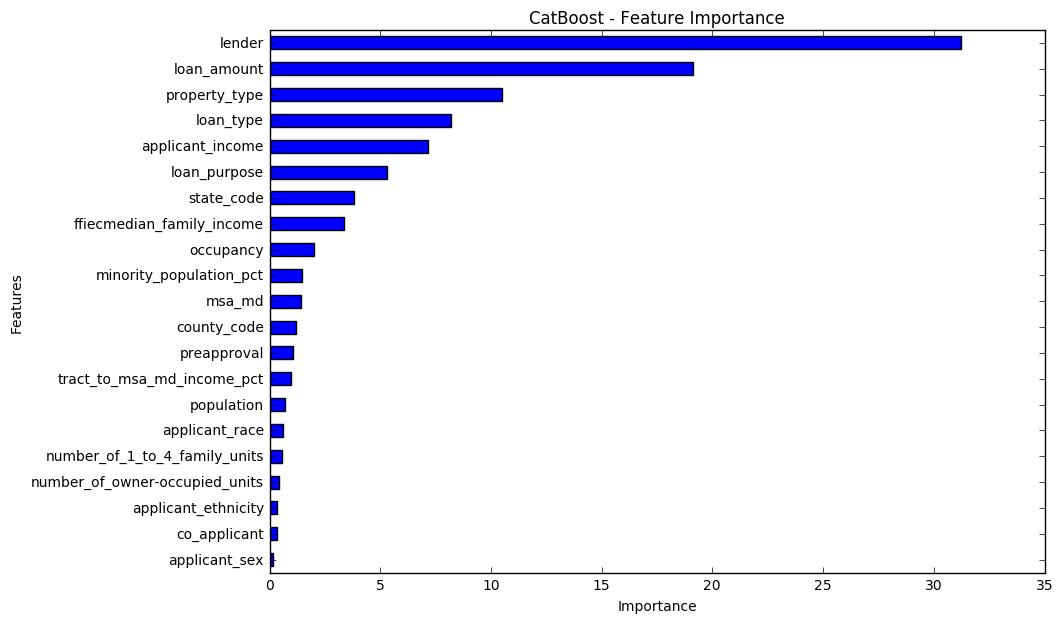

In [19]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [20]:
# Import train_values data
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['test_values']
test_values = ds.to_dataframe()

In [21]:
test_values.drop('row_id', axis = 'columns', inplace = True)

In [22]:
column = {'msa_md': -1,
        'state_code': -1,
        'county_code': -1}
test_values.replace(column, np.nan, inplace = True)

In [23]:
test_values.fillna(-999, inplace = True)

In [24]:
convert_dict = {'loan_type': 'object', 'property_type': 'object', 'loan_purpose': 'object', 'occupancy': 'object',
        'preapproval': 'object', 'msa_md': 'object', 'state_code': 'object', 'county_code': 'object',
       'applicant_ethnicity': 'object', 'applicant_race': 'object', 'applicant_sex': 'object',
       'lender': 'object', 'co_applicant': 'bool'}
test_values = test_values.astype(convert_dict)
test_values.dtypes

loan_type                          object
property_type                      object
loan_purpose                       object
occupancy                          object
loan_amount                       float64
preapproval                        object
msa_md                             object
state_code                         object
county_code                        object
applicant_ethnicity                object
applicant_race                     object
applicant_sex                      object
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                             object
co_applicant                         bool
dtype: object

In [25]:
# predicting with validation set label
y_pred_cat_model = model.predict(test_values)

In [26]:
# Submission file 
from azureml import Workspace
ws = Workspace()
ds = ws.datasets['submission_format']
submission = ds.to_dataframe()

In [27]:
submission = submission.iloc[:, 0]
file = {'row_id': submission, 'rate_spread': y_pred_cat_model.astype('float64')}
submission_format = pd.DataFrame(file, columns = ['row_id', 'rate_spread'])

In [28]:
# Submit file to be sent to submission folder
submission_format.to_csv('submission.cat_model.csv', index = False)

In [29]:
submission_format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
row_id         200000 non-null int64
rate_spread    200000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB


In [30]:
submission_format.head()

,row_id,rate_spread
0,0,6.091520
1,1,2.031980
2,2,1.782156
3,3,1.655204
4,4,1.747865
